Load necessary Libraries

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Load the train data

In [37]:
df_train=pd.read_csv("/content/drive/MyDrive/credit_card_fraud/fraudTrain.csv")
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765749,797096,03-12-2019 08:35,5.780000e+11,"fraud_Raynor, Reinger and Hagenes",gas_transport,59.74,James,Strickland,M,25454 Leonard Lake,...,40.6153,-79.4545,972,Public relations account executive,23-10-1997,fc143e2c17b911a34025b57942653293,1354523752,41.568417,-80.140806,0
765750,797097,03-12-2019 08:36,4.470000e+15,fraud_Barrows PLC,shopping_pos,7.26,Matthew,Russell,M,168 Michael Coves Suite 343,...,37.7773,-119.0825,633,Health service manager,09-09-1927,d01884f69da8191445c28e710665c886,1354523761,37.517301,-118.252438,0
765751,797098,03-12-2019 08:36,3.480000e+14,fraud_Heathcote LLC,shopping_net,190.69,Michael,Rowe,M,7428 Martinez Flats,...,28.1384,-80.6524,139650,Database administrator,23-01-1957,27004ace40284292b383338588e40097,1354523804,28.592101,-81.373842,0
765752,797099,03-12-2019 08:36,2.270000e+15,"fraud_Towne, Greenholt and Koepp",shopping_net,1.67,Shannon,Patterson,F,9808 Ellis Bypass,...,42.6835,-77.8664,4895,Acupuncturist,29-10-1958,3365d0223f9058948acf2ec30599869e,1354523805,41.833084,-77.401258,0


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765754 entries, 0 to 765753
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             765754 non-null  int64  
 1   trans_date_trans_time  765754 non-null  object 
 2   cc_num                 765754 non-null  float64
 3   merchant               765754 non-null  object 
 4   category               765754 non-null  object 
 5   amt                    765754 non-null  float64
 6   first                  765754 non-null  object 
 7   last                   765754 non-null  object 
 8   gender                 765754 non-null  object 
 9   street                 765754 non-null  object 
 10  city                   765754 non-null  object 
 11  state                  765754 non-null  object 
 12  zip                    765754 non-null  int64  
 13  lat                    765754 non-null  float64
 14  long                   765754 non-nu

In [39]:
df_train.shape

(765754, 23)

Load the test data

In [40]:
df_test=pd.read_csv("/content/drive/MyDrive/credit_card_fraud/fraudTest.csv")
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76313,76313,18-07-2020 00:49,3.760000e+14,fraud_Herzog Ltd,misc_pos,4.21,Christopher,Carr,M,62931 Ralph Court,...,27.9611,-81.9398,237282,"Radiographer, therapeutic",28-09-1961,027105068c576c74b24ef354def16c82,1374108598,28.685076,-82.023367,0
76314,76314,18-07-2020 00:51,4.670000e+15,fraud_Parisian and Sons,gas_transport,69.38,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304,Retail banker,25-07-1955,a74f146e6b988a4da3569fec675fb068,1374108711,40.517175,-85.777293,0
76315,76315,18-07-2020 00:54,3.590000e+15,fraud_Kiehn-Emmerich,grocery_pos,189.60,Crystal,Fuller,F,000 Jennifer Mills,...,47.4974,-122.0107,50489,Osteopath,29-02-1984,fe4647470f45be74adfb1ba33e7b364f,1374108863,47.739041,-121.453564,0
76316,76316,18-07-2020 00:54,4.720000e+18,fraud_Kerluke Inc,misc_net,5.46,Robert,Drake,M,463 Willie Estates,...,36.6966,-96.7869,471,Sub,30-03-1941,1701854c42782d1590a2ca713a2e5110,1374108865,36.786906,-97.073504,0


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76318 entries, 0 to 76317
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             76318 non-null  int64  
 1   trans_date_trans_time  76318 non-null  object 
 2   cc_num                 76318 non-null  float64
 3   merchant               76318 non-null  object 
 4   category               76318 non-null  object 
 5   amt                    76318 non-null  float64
 6   first                  76318 non-null  object 
 7   last                   76318 non-null  object 
 8   gender                 76318 non-null  object 
 9   street                 76318 non-null  object 
 10  city                   76318 non-null  object 
 11  state                  76318 non-null  object 
 12  zip                    76318 non-null  int64  
 13  lat                    76318 non-null  float64
 14  long                   76318 non-null  float64
 15  ci

In [42]:
df_test.shape

(76318, 23)

In [43]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,76313,18-07-2020 00:49,3.760000e+14,fraud_Herzog Ltd,misc_pos,4.21,Christopher,Carr,M,62931 Ralph Court,...,27.9611,-81.9398,237282,"Radiographer, therapeutic",28-09-1961,027105068c576c74b24ef354def16c82,1374108598,28.685076,-82.023367,0
842068,76314,18-07-2020 00:51,4.670000e+15,fraud_Parisian and Sons,gas_transport,69.38,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304,Retail banker,25-07-1955,a74f146e6b988a4da3569fec675fb068,1374108711,40.517175,-85.777293,0
842069,76315,18-07-2020 00:54,3.590000e+15,fraud_Kiehn-Emmerich,grocery_pos,189.60,Crystal,Fuller,F,000 Jennifer Mills,...,47.4974,-122.0107,50489,Osteopath,29-02-1984,fe4647470f45be74adfb1ba33e7b364f,1374108863,47.739041,-121.453564,0
842070,76316,18-07-2020 00:54,4.720000e+18,fraud_Kerluke Inc,misc_net,5.46,Robert,Drake,M,463 Willie Estates,...,36.6966,-96.7869,471,Sub,30-03-1941,1701854c42782d1590a2ca713a2e5110,1374108865,36.786906,-97.073504,0


Checking if there is duplicates or missing values

In [44]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [11]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [45]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M")


In [46]:
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_weekday'] = df['trans_date_trans_time'].dt.weekday
df['transaction_month'] = df['trans_date_trans_time'].dt.month

In [47]:
df.drop(["Unnamed: 0","cc_num","trans_date_trans_time","merchant","first","last","dob"],axis=1,inplace=True)
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_weekday,transaction_month
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,misc_pos,4.21,M,62931 Ralph Court,Lakeland,FL,33813,27.9611,-81.9398,237282,"Radiographer, therapeutic",027105068c576c74b24ef354def16c82,1374108598,28.685076,-82.023367,0,0,18,5,7
842068,gas_transport,69.38,M,3653 Ryan Crossroad,Andrews,IN,46702,40.8618,-85.6067,2304,Retail banker,a74f146e6b988a4da3569fec675fb068,1374108711,40.517175,-85.777293,0,0,18,5,7
842069,grocery_pos,189.60,F,000 Jennifer Mills,Issaquah,WA,98027,47.4974,-122.0107,50489,Osteopath,fe4647470f45be74adfb1ba33e7b364f,1374108863,47.739041,-121.453564,0,0,18,5,7
842070,misc_net,5.46,M,463 Willie Estates,Burbank,OK,74633,36.6966,-96.7869,471,Sub,1701854c42782d1590a2ca713a2e5110,1374108865,36.786906,-97.073504,0,0,18,5,7


In [15]:
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_weekday,transaction_month
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,misc_pos,4.21,M,62931 Ralph Court,Lakeland,FL,33813,27.9611,-81.9398,237282,"Radiographer, therapeutic",027105068c576c74b24ef354def16c82,1374108598,28.685076,-82.023367,0,0,18,5,7
842068,gas_transport,69.38,M,3653 Ryan Crossroad,Andrews,IN,46702,40.8618,-85.6067,2304,Retail banker,a74f146e6b988a4da3569fec675fb068,1374108711,40.517175,-85.777293,0,0,18,5,7
842069,grocery_pos,189.60,F,000 Jennifer Mills,Issaquah,WA,98027,47.4974,-122.0107,50489,Osteopath,fe4647470f45be74adfb1ba33e7b364f,1374108863,47.739041,-121.453564,0,0,18,5,7
842070,misc_net,5.46,M,463 Willie Estates,Burbank,OK,74633,36.6966,-96.7869,471,Sub,1701854c42782d1590a2ca713a2e5110,1374108865,36.786906,-97.073504,0,0,18,5,7


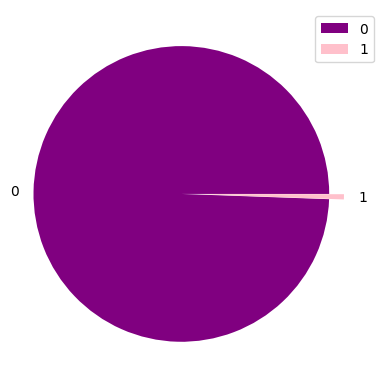

In [16]:
t=df["is_fraud"].value_counts()
lbl=["0","1"]
plt.pie(t,labels=lbl,explode=[0.1,0],colors=["Purple","pink"])
plt.legend()
plt.show()

In [17]:



filtered_df = df[df['is_fraud'] == 1]


job_counts = filtered_df['job'].value_counts()


most_fraudulent_job = job_counts.head()

print("Job with the highest number of fraudulent cases:", most_fraudulent_job)

Job with the highest number of fraudulent cases: job
Materials engineer                50
Exercise physiologist             37
Prison officer                    37
Television/film/video producer    37
Trading standards officer         37
Name: count, dtype: int64


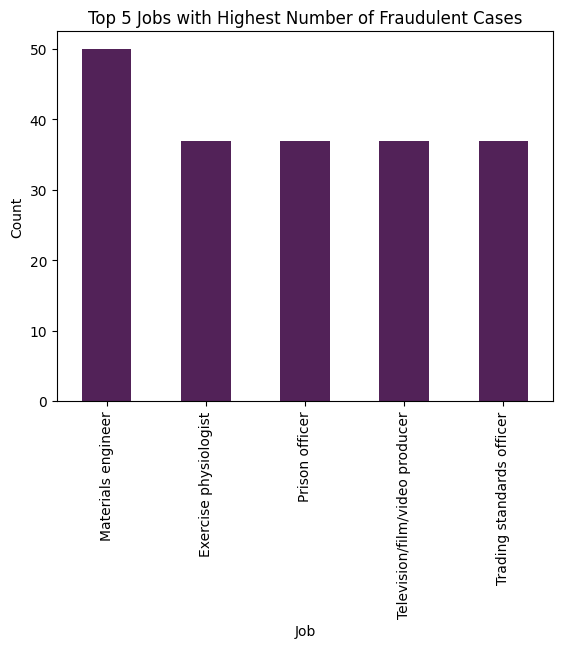

In [18]:
most_fraudulent_job.plot(kind='bar',color=["#522258"])
plt.title('Top 5 Jobs with Highest Number of Fraudulent Cases')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

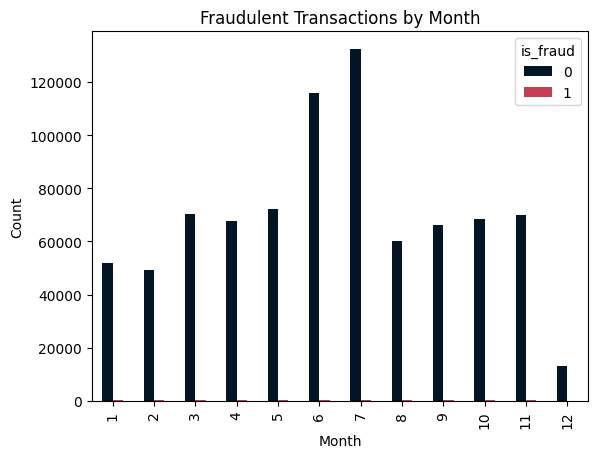

In [19]:
grouped_data = df.groupby('transaction_month')['is_fraud'].value_counts().unstack()

# Create a bar chart
grouped_data.plot(kind='bar',color=["#021526","#C63C51"])
plt.title('Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

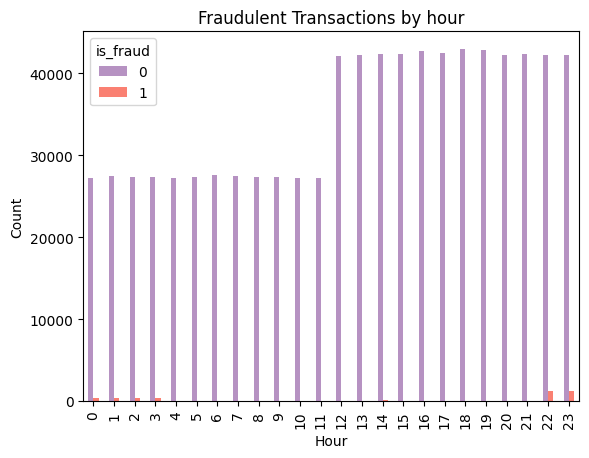

In [48]:
grouped_data = df.groupby('transaction_hour')['is_fraud'].value_counts().unstack()

# Create a bar chart
grouped_data.plot(kind='bar',color=['#B692C2', 'salmon'])
plt.title('Fraudulent Transactions by hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [21]:
filtered_df = df[df['is_fraud'] == 1]


city_counts = filtered_df['city'].value_counts()


top_5_city = city_counts.nlargest(5)

print("Top 5 city with the highest number of fraudulent transactions:")
print(top_5_city)

Top 5 city with the highest number of fraudulent transactions:
city
Naples         29
Detroit        26
Albuquerque    24
Aurora         23
Louisville     23
Name: count, dtype: int64


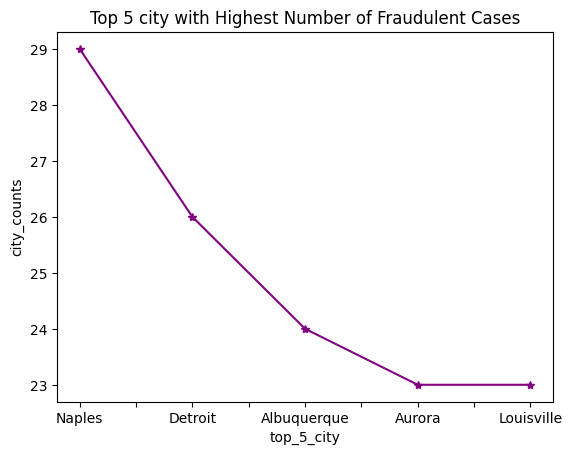

In [22]:
top_5_city.plot(kind='line', marker='*',color="Purple")
plt.title('Top 5 city with Highest Number of Fraudulent Cases')
plt.xlabel('top_5_city')
plt.ylabel('city_counts')
plt.show()

In [23]:
df.drop(["transaction_hour","transaction_day","transaction_weekday","transaction_month"],axis=1,inplace=True)
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,misc_pos,4.21,M,62931 Ralph Court,Lakeland,FL,33813,27.9611,-81.9398,237282,"Radiographer, therapeutic",027105068c576c74b24ef354def16c82,1374108598,28.685076,-82.023367,0
842068,gas_transport,69.38,M,3653 Ryan Crossroad,Andrews,IN,46702,40.8618,-85.6067,2304,Retail banker,a74f146e6b988a4da3569fec675fb068,1374108711,40.517175,-85.777293,0
842069,grocery_pos,189.60,F,000 Jennifer Mills,Issaquah,WA,98027,47.4974,-122.0107,50489,Osteopath,fe4647470f45be74adfb1ba33e7b364f,1374108863,47.739041,-121.453564,0
842070,misc_net,5.46,M,463 Willie Estates,Burbank,OK,74633,36.6966,-96.7869,471,Sub,1701854c42782d1590a2ca713a2e5110,1374108865,36.786906,-97.073504,0


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
labels=["category","gender","street","city","state","job","trans_num"]
for label in labels:
  df[label]=encoder.fit_transform(df[label])

In [25]:
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,553,513,27,28654,36.0788,-81.1781,3495,368,36594,1325376018,36.011293,-82.048315,0
1,4,107.23,0,425,595,47,99160,48.8878,-118.2105,149,424,103409,1325376044,49.159047,-118.186462,0
2,0,220.11,1,587,457,13,83252,42.1808,-112.2620,4154,305,531824,1325376051,43.150704,-112.154481,0
3,2,45.00,1,902,83,26,59632,46.2306,-112.1138,1939,326,353666,1325376076,47.034331,-112.561071,0
4,9,41.96,1,410,211,45,24433,38.4207,-79.4629,99,116,539864,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,9,4.21,1,618,415,9,33813,27.9611,-81.9398,237282,385,8054,1374108598,28.685076,-82.023367,0
842068,2,69.38,1,368,22,15,46702,40.8618,-85.6067,2304,395,550493,1374108711,40.517175,-85.777293,0
842069,4,189.60,0,0,374,47,98027,47.4974,-122.0107,50489,322,836457,1374108863,47.739041,-121.453564,0
842070,8,5.46,1,458,106,36,74633,36.6966,-96.7869,471,432,75583,1374108865,36.786906,-97.073504,0


In [26]:
X=df.iloc[:,:-1]
X

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long
0,8,4.97,0,553,513,27,28654,36.0788,-81.1781,3495,368,36594,1325376018,36.011293,-82.048315
1,4,107.23,0,425,595,47,99160,48.8878,-118.2105,149,424,103409,1325376044,49.159047,-118.186462
2,0,220.11,1,587,457,13,83252,42.1808,-112.2620,4154,305,531824,1325376051,43.150704,-112.154481
3,2,45.00,1,902,83,26,59632,46.2306,-112.1138,1939,326,353666,1325376076,47.034331,-112.561071
4,9,41.96,1,410,211,45,24433,38.4207,-79.4629,99,116,539864,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842067,9,4.21,1,618,415,9,33813,27.9611,-81.9398,237282,385,8054,1374108598,28.685076,-82.023367
842068,2,69.38,1,368,22,15,46702,40.8618,-85.6067,2304,395,550493,1374108711,40.517175,-85.777293
842069,4,189.60,0,0,374,47,98027,47.4974,-122.0107,50489,322,836457,1374108863,47.739041,-121.453564
842070,8,5.46,1,458,106,36,74633,36.6966,-96.7869,471,432,75583,1374108865,36.786906,-97.073504


In [27]:
y=df.iloc[:,-1]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
842067,0
842068,0
842069,0
842070,0


Oversampling due to imbalanced data

In [28]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
X_os,y_os=os.fit_resample(X,y)

In [29]:
X_os.shape

(1674606, 15)

In [30]:
y_os.shape

(1674606,)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=StandardScaler()
X_os_scaled=scaler.fit_transform(X_os,y_os)

Model Building

DecisionTreeClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    251188
           1       0.98      0.99      0.98    251194

    accuracy                           0.98    502382
   macro avg       0.98      0.98      0.98    502382
weighted avg       0.98      0.98      0.98    502382

98.4497852231967
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    251188
           1       1.00      1.00      1.00    251194

    accuracy 

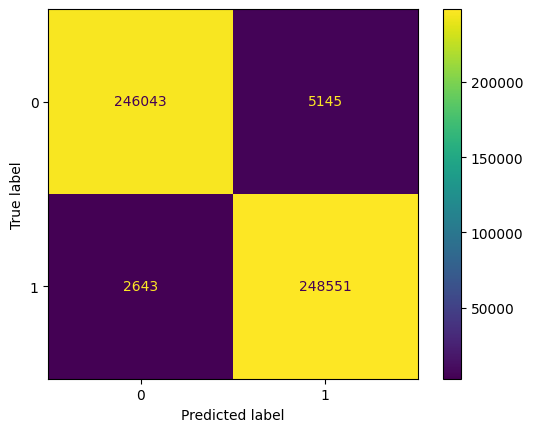

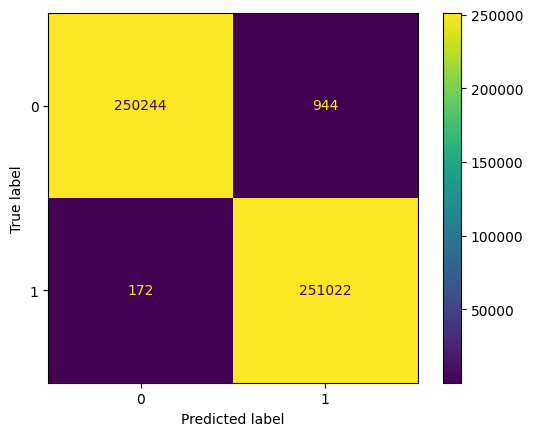

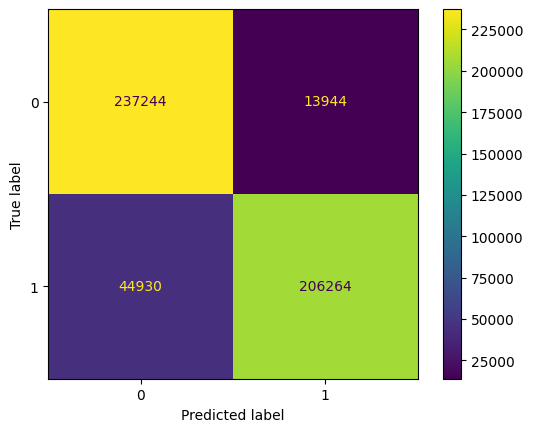

In [32]:
from sklearn.model_selection import train_test_split
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)
dt_os=DecisionTreeClassifier(random_state=1)
rf_os=RandomForestClassifier(random_state=1)
lr_os=LogisticRegression(random_state=1)

accuracy_scores_os=[]
model=[dt_os,rf_os,lr_os]
for select in model:
  print(select)
  select.fit(X_os_train,y_os_train)
  y_os_pred=select.predict(X_os_test)
  y_os_pred
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  accuracy_os=accuracy_score(y_os_test,y_os_pred)*100
  print(accuracy_os)
  accuracy_scores_os.append(accuracy_os)
  print("--"*200)

In [33]:
y_new=rf_os.predict(scaler.transform([[9,13.74,0,786,198,16,66018,38.9462,-94.9714,5760,74,125347,1374983208,39.542364,-94.963157]]))
result=y_new.item()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
if result==0:
  print(" it is not fraud transaction ")

else:
    print("Its is fraud transaction ")

 it is not fraud transaction 
